Полносвязные нейронные сети

**Цель работы:**

обучить нейронную сеть для выполнения задачи регрессии и классификации.

Для выполнения работы взят датасет с сайта Kaggle (ссылка на страницу с датасетом: https://www.kaggle.com/datasets/egorkainov/moscow-housing-price-dataset).


Выбранный набор данных содержит информацию, необходимую для прогнозирования цен на жилье в Москве и Московской области. Собранные в ноябре 2023 года данные актуальны и значимы для анализа. Датасет включает в себя различные категории, важные для прогнозирования стоимости жилья, такие как местоположение, размер, удобства и другие существенные факторы, влияющие на цены на недвижимость.

Содержание датасета:

1. Price: Цена квартиры в указанной валюте. Это основная целевая переменная для прогнозирования.

2. Apartment type: Тип квартиры, такой как студия, однокомнатная, двухкомнатная и т. д.

3. Metro station: Название ближайшей к местоположению квартиры станции метро.

4. Minutes to metro: Время в минутах, необходимое для пешей прогулки от квартиры до ближайшей станции метро.

5. Region: Регион, где расположена квартира (Москва или Московская область).

6. Number of rooms: Общее количество комнат в квартире, включая спальни, гостиные и т. д.

7. Area: Общая площадь квартиры в квадратных метрах.

8. Living area: Жилая площадь квартиры в квадратных метрах, т.е. площадь, пригодная для проживания.

9. Kitchen area: Площадь кухни в квадратных метрах.

10. Floor: Этаж, на котором находится квартира.

11. Number of floors: Общее количество этажей в здании, где расположена квартира.

12. Renovation: Уровень ремонта квартиры, такой как "без ремонта", "косметический ремонт", "евроремонт" и т. д.

Предварительная обработка:

Загрузка файла, создание датасета.

In [ ]:
import pandas as pd
from google.colab import files

df = pd.read_csv('/flats_in_msk.csv', sep=',')

In [ ]:
df.dtypes

Price               float64
Apartment type       object
Metro station        object
Minutes to metro    float64
Region               object
Number of rooms     float64
Area                float64
Living area         float64
Kitchen area        float64
Floor               float64
Number of floors      int64
Renovation           object
dtype: object

Пример данных:

In [ ]:
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


Для поля Floor и Number of rooms не актуален тип float64, так как колличество этажей и комнат всегда целые числа. Требуется внести изменения.

In [ ]:
df['Floor'] = df['Floor'].astype(int)
df['Number of rooms'] = df['Number of rooms'].astype(int)

Проверка внесенных изменений:

In [ ]:
df.dtypes

Price               float64
Apartment type       object
Metro station        object
Minutes to metro    float64
Region               object
Number of rooms       int64
Area                float64
Living area         float64
Kitchen area        float64
Floor                 int64
Number of floors      int64
Renovation           object
dtype: object

Изменения внесены. Теперь все типы соответствуют данным.

In [ ]:
df.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


Данная таблица представляет собой статистические данные о недвижимости на рынке недвижимости Москвы и Московской области. На основе таблицы данных можно сделать некоторые выводы:

- Среднее значение цены составляет примерно 36 миллионов, а максимальное значение составляет около 2.455 миллиардов. Это указывает на значительный разброс цен. Стандартное отклонение (std) также высоко, что указывает на большую вариацию в ценах (большой разброс цен).

- Среднее значение времени до метро составляет примерно 11.9 минуты, с максимумом в 60 минут. Можно сделать вывод, что в основном квартиры находятся в близкой доступности к метро.

- Среднее количество комнат составляет около 2. Минимальное значение - 6, максимальное - 12.

- Средняя общая площадь составляет около 72 квадратных метров, с большим стандартным отклонением. Максимальное значение площади составляет около 1117 квадратных метров. В датасете присутствуют записи о квартирах различной площади.

- Средние значения жилой и кухонной площадей составляют 38.5 и 12.6 соответственно. Так как максимальные значения очень далеки от средних, можно сказать, что в данных есть выбросы.

- Средний этаж квартир - 9.

- Среднее количество этажей в здании - 16, с максимумом в 92.

In [ ]:
df.shape

(22676, 12)

В датасете 22676 записей и 12 колонок.

In [ ]:
df.isna().sum() #подсчет количества пропусков

Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

Пропусков в данных не обнаружено.

In [ ]:
df.duplicated().sum() # подсчет количества дубликатов

1835

Так как найдено много явных дубликатов, требуется их устранение.

In [ ]:
df = df.drop_duplicates() # удаление дубликатов
df.duplicated().sum()

0

Все дубликаты успешно удалены. Требуется обновление индексации.

In [ ]:
df.reset_index(drop=True, inplace=True) # обновление индексации; аргумент drop, чтобы не создавать столбец index

Для каждого текстового столбца осуществляется поиск уникальных значений и при наличии дубликатов устранение их.

In [ ]:
print(df['Apartment type'].unique()) # Поиск уникальных значений в столбце "Apartment type"

['Secondary' 'New building']


In [ ]:
print(df['Metro station'].unique()) # Поиск уникальных значений в столбце "Metro station"

[' Опалиха' ' Павшино' ' Мякинино' ' Строгино' ' Нахабино'
 ' Красногорская' ' Тушинская' ' Аникеевка' ' Волоколамская' ' Пенягино'
 ' Митино' ' Пятницкое шоссе' ' Чеховская' ' Арбатская' ' Фили'
 ' Белорусская' ' Кропоткинская' ' Спортивная' ' Алексеевская'
 ' Ростокино' ' Китай-город' ' ВДНХ' ' Динамо' ' Филатов Луг' ' Раменки'
 ' Минская' ' Аминьевская' ' Давыдково' ' Фрунзенская' ' Улица 1905 года'
 ' Кунцевская' ' Шелепиха' ' Молодёжная' ' Беговая' ' Бауманская'
 ' Славянский бульвар' ' Новокузнецкая' ' Парк Культуры' ' Смоленская'
 ' Пушкинская' ' Комсомольская' ' Серпуховская' ' Трубная'
 ' Народное Ополчение' ' Киевская' ' Технопарк' ' Преображенская площадь'
 ' Павелецкая' ' Красные ворота' ' Тверская' ' Петровский Парк'
 ' Аэропорт' ' Площадь Ильича' ' Краснопресненская' ' Курская'
 ' Третьяковская' ' Охотный ряд' ' Деловой центр' ' Полянка'
 ' Волгоградский проспект' ' Выставочная' ' Тестовская' ' Сходненская'
 ' Прокшино' ' Окружная' ' Рабочий посёлок' ' Селигерская'
 ' Лом

In [ ]:
print(df['Region'].unique()) # Поиск уникальных значений в столбце "Region"

['Moscow region' 'Moscow']


In [ ]:
print(df['Renovation'].unique()) # Поиск уникальных значений в столбце "Renovation"

['Cosmetic' 'European-style renovation' 'Without renovation' 'Designer']


Неявные дубликаты в данных не обнаружены.

Целевой переменной данного датасета является - Price. Значению X присваиваются все численные данные, кроме целевой переменной. Значению y присваиваются значения целевой переменной.

In [ ]:
y = df['Price']
X = df.drop('Price', axis=1).select_dtypes(include=["number"])

Так как данные в датасете имеют разный диапазон значений, производится их стандартизация.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

Разделение на обучающие и валидационные данные (80% - обучающие, 20% - валидационные).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Создание последовательной модели с помощью Sequential, добавление слоев с помощью Dense. На выходе - 1 нейрон, без функции активации.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

input_shape = X.shape[1] # количество признаков

model.add(Dense(units=1024, activation='relu', input_shape=(input_shape,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1))

# вывод структуры модели
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              8192      
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 533505 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Созданная модель - это модель последовательности. У нее три слоя: входной, скрытый и выходной.В первом слое 1024 нейрона, во втором - 512, в третьем - 1. В качестве функции активации для первых двух слоев используестя функция ReLU - простая кусочно-линейная функция.

Model - название модели, Layer - название и тип слоя в скобках, Output Shape - размер данных на выход из нейронного слоя, Param - количество параметров для слоя.

Общее количество параметров - 533505. Все параметры обучаемы.

Задание параметров в compile. Функция потерь задается "mse" (среднеквадратичняя ошибка, Mean Squared Error). Функция потерь MSE определяется как среднее значение квадрата разности между прогнозируемыми и фактическими значениями. Метод оптимизации "Adam" - это алгоритм оптимизации, который комбинирует адаптивное изменение скорости обучения с моментумом. Метрика, используемая для оценки производительности модели во время обучения - "mae" (среднее абсолютное отклонение, Mean Absolute Error). MAE представляет собой среднее арифметическое абсолютных значений ошибок между фактическими и прогнозируемыми значениями.

In [ ]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

Обучение модели с помощью fit (5 эпох). Для дальнейшего использования в графиках информация о метриках и функции потерь на каждой эпохе обучения сохранияется в переменной history. В качестве параметра при обучении также передаются валидационные данные, которые позволят оценить производительность модели во время обучения.

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
521/521 [==============================] - 8s 14ms/step - loss: 7684693998698496.0000 - mae: 34005584.0000 - val_loss: 6648616353529856.0000 - val_mae: 33761972.0000
Epoch 2/5
521/521 [==============================] - 8s 16ms/step - loss: 7555481518211072.0000 - mae: 33478326.0000 - val_loss: 6410732610519040.0000 - val_mae: 32742424.0000
Epoch 3/5
521/521 [==============================] - 7s 14ms/step - loss: 7086626245181440.0000 - mae: 31629240.0000 - val_loss: 5757355341905920.0000 - val_mae: 29879380.0000
Epoch 4/5
521/521 [==============================] - 8s 16ms/step - loss: 6266279438581760.0000 - mae: 28114166.0000 - val_loss: 4899432940175360.0000 - val_mae: 25907322.0000
Epoch 5/5
521/521 [==============================] - 7s 13ms/step - loss: 5288900037705728.0000 - mae: 24213328.0000 - val_loss: 3953733218074624.0000 - val_mae: 22050560.0000


Выполняется предсказание на валидационных данных.

In [ ]:
predictions = model.predict(X_valid)

131/131 [==============================] - 0s 3ms/step


Создается датафрейм с истинными и предсказанными значениями.

In [ ]:
true_pred_val = pd.DataFrame({'True Values': y_valid, 'Predicted Values': predictions.flatten()})
print(true_pred_val)

       True Values  Predicted Values
14440   10609700.0      1.935777e+06
9818   140000000.0      1.099628e+08
4398     8090000.0      4.105164e+05
9245   132000000.0      6.236534e+07
15827    5823600.0      7.480250e+05
...            ...               ...
2487    26281000.0      5.421105e+06
16787    2638290.0      4.541855e+05
18586    7441612.0      1.063819e+07
11685   27840000.0      6.720211e+07
9520    83000000.0      5.334385e+07

[4169 rows x 2 columns]


Построен график правильных и предсказанных значений.

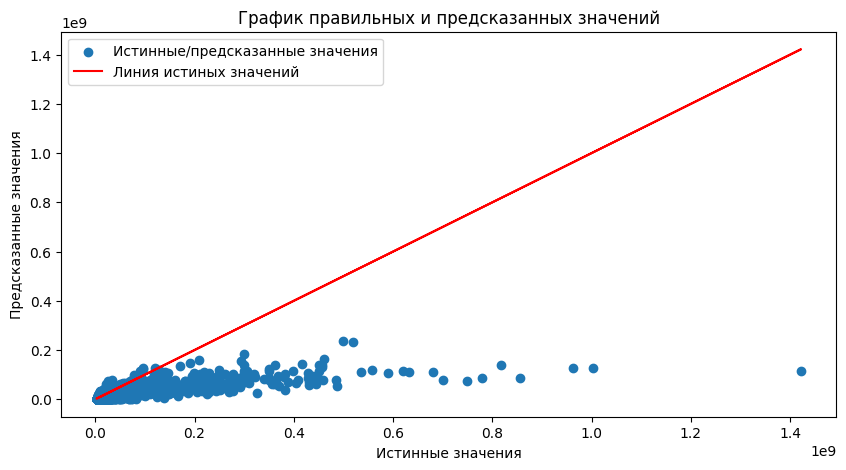

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(true_pred_val['True Values'], true_pred_val['Predicted Values'],
            label='Истинные/предсказанные значения')
plt.plot(true_pred_val['True Values'], true_pred_val['True Values'],
         color='red', label='Линия истиных значений')
plt.title('График правильных и предсказанных значений')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

По визуализированным данным можно сказать, что нейросеть не очень хорошо предсказывает цены на квартиры в Москве и Московской области.

Построение графика ошибок на обучающем и валидационном наборе по эпохам обучения.

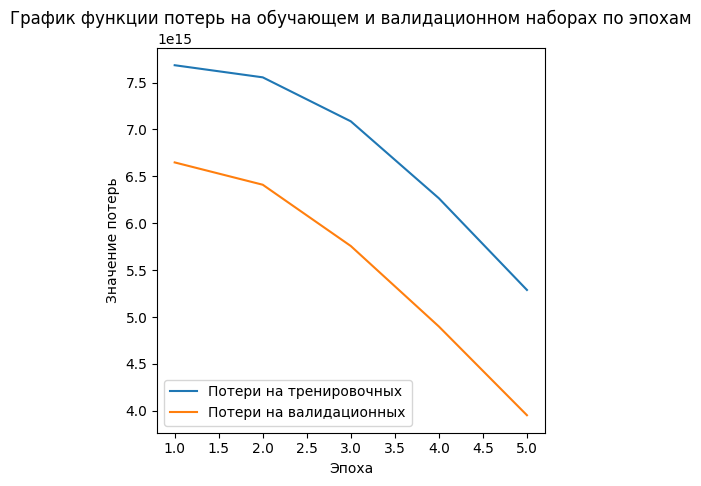

In [ ]:
plt.figure(figsize=(5,5))
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Потери на тренировочных')
plt.plot(epochs, history.history['val_loss'], label = 'Потери на валидационных')
plt.title('График функции потерь на обучающем и валидационном наборах по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

На графике не видно границы переобучения, что означает - модель не переобучена. Предположительно модель недоучена. Значение потерь на валидационном наборе слишком велико и отличается от тренировочных данных. Оптимальное значение эпох - не найдено. Требуется продолжить обучение.

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
521/521 [==============================] - 8s 15ms/step - loss: 4351580870541312.0000 - mae: 21222852.0000 - val_loss: 3216504229199872.0000 - val_mae: 20141714.0000
Epoch 2/5
521/521 [==============================] - 8s 15ms/step - loss: 3638683676704768.0000 - mae: 20058492.0000 - val_loss: 2710398973247488.0000 - val_mae: 19742284.0000
Epoch 3/5
521/521 [==============================] - 6s 12ms/step - loss: 3172916753596416.0000 - mae: 20122526.0000 - val_loss: 2437426421170176.0000 - val_mae: 20141488.0000
Epoch 4/5
521/521 [==============================] - 8s 16ms/step - loss: 2929253595217920.0000 - mae: 20764460.0000 - val_loss: 2327229639950336.0000 - val_mae: 20662920.0000
Epoch 5/5
521/521 [==============================] - 7s 13ms/step - loss: 2805127698186240.0000 - mae: 21074994.0000 - val_loss: 2277953211727872.0000 - val_mae: 21035584.0000


После дополнительного обучения в 5 эпох повторно строится график ошибок на обучающем и валидационном наборе по эпохам обучения.

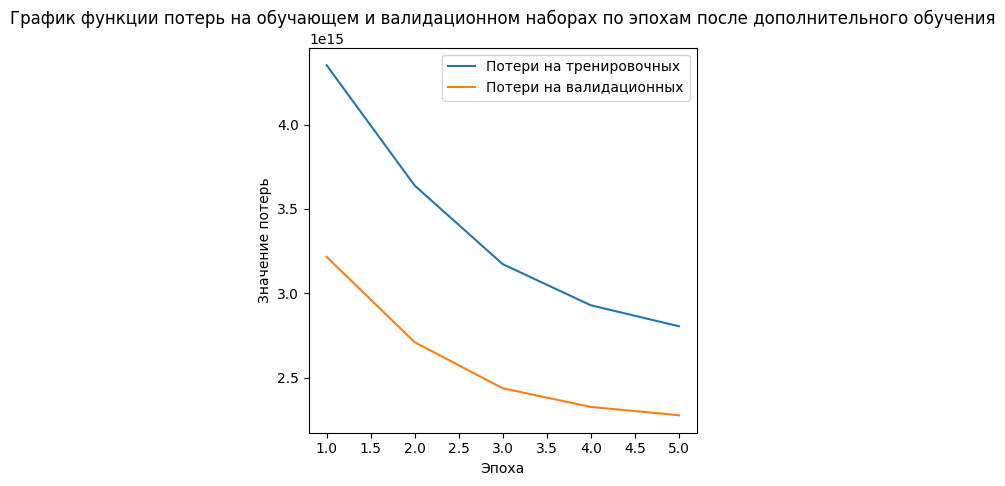

In [ ]:
plt.figure(figsize=(5,5))
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Потери на тренировочных')
plt.plot(epochs, history.history['val_loss'], label = 'Потери на валидационных')
plt.title('График функции потерь на обучающем и валидационном наборах по эпохам после дополнительного обучения')
plt.xlabel('Эпоха')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

Так как график снова не достиг линии переобучения, обучение продолжается.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
521/521 [==============================] - 7s 14ms/step - loss: 2738187411652608.0000 - mae: 21378734.0000 - val_loss: 2255112844083200.0000 - val_mae: 21143464.0000
Epoch 2/20
521/521 [==============================] - 8s 15ms/step - loss: 2697806129135616.0000 - mae: 21349570.0000 - val_loss: 2239955770277888.0000 - val_mae: 21079642.0000
Epoch 3/20
521/521 [==============================] - 7s 13ms/step - loss: 2666192217047040.0000 - mae: 21244044.0000 - val_loss: 2227888254353408.0000 - val_mae: 20941502.0000
Epoch 4/20
521/521 [==============================] - 8s 14ms/step - loss: 2641491860127744.0000 - mae: 21094570.0000 - val_loss: 2214284348096512.0000 - val_mae: 20691490.0000
Epoch 5/20
521/521 [==============================] - 8s 15ms/step - loss: 2619256814436352.0000 - mae: 20815684.0000 - val_loss: 2203254335209472.0000 - val_mae: 20461786.0000
Epoch 6/20
521/521 [==============================] - 7s 14ms/step - loss: 2599687601258496.0000 - mae: 20541334.00

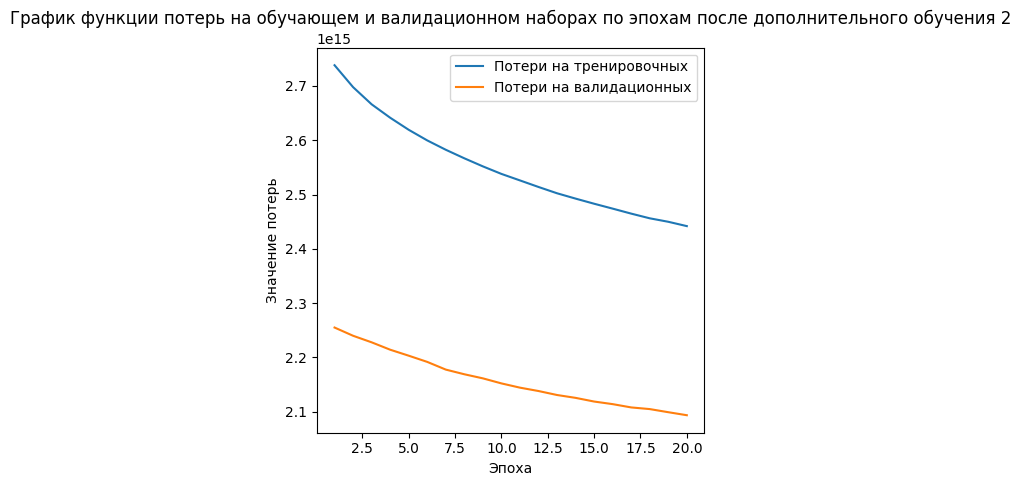

In [ ]:
plt.figure(figsize=(5,5))
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Потери на тренировочных')
plt.plot(epochs, history.history['val_loss'], label = 'Потери на валидационных')
plt.title('График функции потерь на обучающем и валидационном наборах по эпохам после дополнительного обучения 2')
plt.xlabel('Эпоха')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
521/521 [==============================] - 9s 18ms/step - loss: 2434493226942464.0000 - mae: 18039464.0000 - val_loss: 2089883573157888.0000 - val_mae: 17680550.0000
Epoch 2/50
521/521 [==============================] - 7s 14ms/step - loss: 2428670593466368.0000 - mae: 18059188.0000 - val_loss: 2084715519541248.0000 - val_mae: 17579286.0000
Epoch 3/50
521/521 [==============================] - 7s 14ms/step - loss: 2421544974286848.0000 - mae: 17919866.0000 - val_loss: 2080207011840000.0000 - val_mae: 17489284.0000
Epoch 4/50
521/521 [==============================] - 7s 14ms/step - loss: 2415550005248000.0000 - mae: 17794288.0000 - val_loss: 2077636339695616.0000 - val_mae: 17437246.0000
Epoch 5/50
521/521 [==============================] - 7s 13ms/step - loss: 2408838313541632.0000 - mae: 17825650.0000 - val_loss: 2072697664176128.0000 - val_mae: 17344640.0000
Epoch 6/50
521/521 [==============================] - 8s 15ms/step - loss: 2403363035545600.0000 - mae: 17650850.00

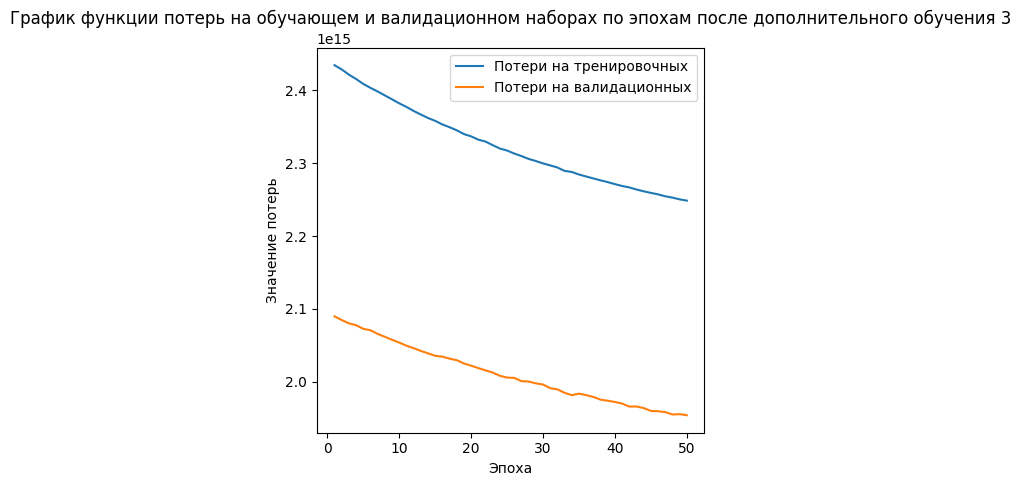

In [ ]:
plt.figure(figsize=(5,5))
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Потери на тренировочных')
plt.plot(epochs, history.history['val_loss'], label = 'Потери на валидационных')
plt.title('График функции потерь на обучающем и валидационном наборах по эпохам после дополнительного обучения 3')
plt.xlabel('Эпоха')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

Даже спустя 80 эпох не вышло добраться до линии переобучения. Это означает, что данная модель не подходит под описание данных датасета.

Предварительная обработка второго датасета.

Содержит информацию о сердечных болезнях

1. возраст
2. пол
3. тип боли в груди *(4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная])*
4. артериальное давление в покое
5. холестерин сыворотки в мг/дл
6. уровень сахара в крови натощак > 120 мг/дл
7. ЭКГ в покое: результаты электрокардиограммы в покое (*норма: нормальная, ST: аномалия ST-T LVN: гипертрофия)*
8. MaxHR: максимальная достигнутая частота сердечных сокращений *[Числовое значение от 60 до 202]*
9. стенокардия, вызванная физической нагрузкой *(да, нет)*
10. oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. наклон пикового сегмента ST при нагрузке *(Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)*
12. HeartDisease: *выходной класс [1: болезнь сердца, 0: нормальный]*

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('/content/1heart (1).csv', sep=',')

Saving 1heart (1).csv to 1heart (1).csv


In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol        object
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Пример данных:

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
count,925.000000,923.000000,925.000000,924.000000,925.000000,925.000000
mean,53.451892,132.442037,0.231351,136.979437,0.882162,0.550270
std,9.453069,18.464707,0.421925,25.507091,1.064803,0.497736
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000


На основе таблицы данных можно сказать, что средний возраст пациентов - 53 года, немного больше половины имеют заболевание сердца. Также можно выяснить максимальные, средние и минимальные значения для таких показателей, как возраст, артериальное давление в покое, уровень сахара в крови натощак, максимальная достигнутая частота сердечных сокращений, депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя.

In [ ]:
df.shape

(925, 12)

В датасете 925 записей и 12 колонок.

In [ ]:
df.isna().sum() #подсчет количества пропусков

Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

В датасете в некоторых колонках присутствуют пропуски. Так как все данные, замененные 0 в числовых ячейках повлияют на кластеризацию. Производится удаление всех пустых записей. А затем подсчет количества пропусков для проверки удаления.

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Все пропуски данных были успешно удалены.

In [ ]:
df.duplicated().sum() # подсчет количества дубликатов

3

Так как обнаружены дубликаты, они удаляются и осуществляется проверка удаления.

In [ ]:
df = df.drop_duplicates() # удаление дубликатов
df.duplicated().sum()

0

Все явные дубликаты устранены. Производится обновление индексации.

In [ ]:
df.reset_index(drop=True, inplace=True) # обновление индексации; аргумент drop, чтобы не создавать столбец index

Для каждого текстового столбца осуществляется поиск уникальных значений и при наличии дубликатов устранение их.

In [ ]:
print(df['Sex'].unique()) # Поиск уникальных значений в столбце "Sex"

['M' 'F' 'Ma']


Обнаружены дубликаты. Необходимо заменить 'Ma' на 'М'. Также осуществляется проверка.

In [ ]:
df['Sex'].replace('Ma', 'M', inplace=True)
print(df['Sex'].unique()) # Поиск уникальных значений в столбце "Sex"

['M' 'F']


<ipython-input-82-23355d7716d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'].replace('Ma', 'M', inplace=True)


Успешное устранение.

In [ ]:
print(df['ChestPainType'].unique()) # Поиск уникальных значений в столбце "ChestPainType"

['ATA' 'NAP' 'ASY' 'TA']


Дубликаты не обнаружены.

In [ ]:
print(df['Cholesterol'].unique()) # Поиск уникальных значений в столбце "Cholesterol"

['289' '180' '283' '214' '195' '339' '237' '208' '207' '284' '211' '164'
 '204' '234' '273' '196' '248' '267' '223' '184' '201' '288' '209' '260'
 '468' '188' '518' '167' '224' '172' '186' '254' '306' '250' '177' '227'
 '230' '294' '264' '259' '175' '318' '216' '340' '233' '205' '245' '194'
 '270' '213' '365' '342' '253' '277' '202' '297' '225' '246' '412' '265'
 '215' '182' '218' '268' '163' '529' '100' '206' '238' '139' '263' '291'
 '229' '307' '210' '329' '147' '85' '269' '275' '179' '392' '466' '129'
 '241' '255' '276' '282' '338' '160' '156' '272' '240' '393' '161' '228'
 '292' '388' '166' '247' '331' '341' '243' '279' '198' '249' '168' '603'
 '159' '190' '185' '290' '212' '231' '222' '235' '320' '187' '266' '287'
 '404' '312' '251' '328' '285' '280' '192' '193' '308' '219' '257' '132'
 '226' '217' '303' '298' '256' '117' '295' '173' '315' '281' '309' '200'
 '336' '355' '326' '171' '491' '271' '274' '394' '221' '126' '305' '220'
 '242' '347' '344' '358' '169' '181' '0' '236' '203'

Так как это числа, данные не нуждаются в вычислении дубликатов. Однако есть числа с буквами, которые стоит заменить. Также сделана проверка для того, чтобы убедиться в корректной замене.

In [ ]:
df['Cholesterol'].replace('a241', '241', inplace=True)
print(df['Cholesterol'].unique()) # Поиск уникальных значений в столбце "Cholesterol"

['289' '180' '283' '214' '195' '339' '237' '208' '207' '284' '211' '164'
 '204' '234' '273' '196' '248' '267' '223' '184' '201' '288' '209' '260'
 '468' '188' '518' '167' '224' '172' '186' '254' '306' '250' '177' '227'
 '230' '294' '264' '259' '175' '318' '216' '340' '233' '205' '245' '194'
 '270' '213' '365' '342' '253' '277' '202' '297' '225' '246' '412' '265'
 '215' '182' '218' '268' '163' '529' '100' '206' '238' '139' '263' '291'
 '229' '307' '210' '329' '147' '85' '269' '275' '179' '392' '466' '129'
 '241' '255' '276' '282' '338' '160' '156' '272' '240' '393' '161' '228'
 '292' '388' '166' '247' '331' '341' '243' '279' '198' '249' '168' '603'
 '159' '190' '185' '290' '212' '231' '222' '235' '320' '187' '266' '287'
 '404' '312' '251' '328' '285' '280' '192' '193' '308' '219' '257' '132'
 '226' '217' '303' '298' '256' '117' '295' '173' '315' '281' '309' '200'
 '336' '355' '326' '171' '491' '271' '274' '394' '221' '126' '305' '220'
 '242' '347' '344' '358' '169' '181' '0' '236' '203'

Неявные дубликаты устранены.

In [ ]:
print(df['RestingECG'].unique()) # Поиск уникальных значений в столбце "RestingECG"

['Normal' 'ST' 'LVH']


Дубликаты не обнаружены.

In [ ]:
print(df['ExerciseAngina'].unique()) # Поиск уникальных значений в столбце "ExerciseAngina"

['N' 'Y']


Дубликаты не обнаружены.

In [ ]:
print(df['ST_Slope'].unique()) # Поиск уникальных значений в столбце "ST_Slope"

['Up' 'Flat' 'Down' 'UP']


Обнаружен дубликат. Нужно 'UP' заменит на 'Up'. После замены осуществляется проверка.

In [ ]:
df['ST_Slope'].replace('UP', 'Up', inplace=True)
print(df['ST_Slope'].unique()) # Поиск уникальных значений в столбце "ST_Slope"

['Up' 'Flat' 'Down']


Дубликат устранен.

Ранее было замечено несоответствие данных колонки "Cholesterol" типу текстовому. Соответственно требуется изменить его на float. После изменения производится проверка.

In [ ]:
df['Cholesterol'] = df['Cholesterol'].astype(float)
df['Cholesterol'].dtypes

dtype('float64')

Тип успешно изменен.

Целевой переменной данного датафрейма является 'HeartDisease', которая показывает, есть ли у человека сердечное заболевание или нет.

Разбиение набора данных на тренировочный и тестовый датасеты с помощью train_test_split и выполнение стандартизации числовых данных с помощью StandardScaler (20% test, 80% train).

In [ ]:
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

X_num = X.select_dtypes(include='number') # выбираются только числовые столбцы

X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2)

scaler = StandardScaler() # создание

# преобразование
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Создание модели.

In [ ]:
model2 = Sequential()

input_shape = X_num.shape[1] # количество признаков

model2.add(Dense(units=16, activation='relu', input_shape=(input_shape,)))
model2.add(Dense(units=1, activation='sigmoid'))

# вывод структуры модели
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 16)                112       
                                                                 
 dense_38 (Dense)            (None, 1)                 17        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Созданная модель - это модель последовательности. У нее два слоя: входной и выходной.В первом слое 16 нейронов, во втором - 1. В качестве функции активации для первого слоя используестя функция ReLU - простая кусочно-линейная функция. Для второго - Sigmoid.


Model - название модели, Layer - название и тип слоя в скобках, Output Shape - размер данных на выход из нейронного слоя, Param - количество параметров для слоя.


Общее количество параметров - 129. Все параметры обучаемы.

Модели были присвоены параметры. Функция binary_crossentropy позволяет получать бинарные результаты.

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "mae"])

Было произведено обучение модели на тренировочной выборке.

In [ ]:
history = model2.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

Epoch 1/50
23/23 [==============================] - 1s 12ms/step - loss: 0.6226 - accuracy: 0.6785 - mae: 0.4474 - val_loss: 0.5979 - val_accuracy: 0.7446 - val_mae: 0.4343
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.7166 - mae: 0.4295 - val_loss: 0.5772 - val_accuracy: 0.7717 - val_mae: 0.4205
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.7275 - mae: 0.4143 - val_loss: 0.5614 - val_accuracy: 0.7880 - val_mae: 0.4083
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5574 - accuracy: 0.7343 - mae: 0.4010 - val_loss: 0.5491 - val_accuracy: 0.7989 - val_mae: 0.3977
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5448 - accuracy: 0.7371 - mae: 0.3900 - val_loss: 0.5397 - val_accuracy: 0.7880 - val_mae: 0.3888
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.7466 - mae: 0.3803 - val_loss: 0.5328 - val_ac

Предсказание по тестовой выборке.

In [ ]:
y_pred = model2.predict(X_test_scaled)

6/6 [==============================] - 0s 2ms/step


Создание датафрейма с истинными и предсказанными значениями.

In [ ]:
true_pred_val2 = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred.flatten()})
print(true_pred_val2)

     True Values  Predicted Values
668            0          0.119963
323            1          0.647879
739            1          0.871193
40             0          0.102002
775            0          0.200103
..           ...               ...
643            1          0.268572
629            1          0.818757
677            0          0.927921
525            0          0.422678
700            0          0.973703

[184 rows x 2 columns]


Построен график метрики качества по эпохам.

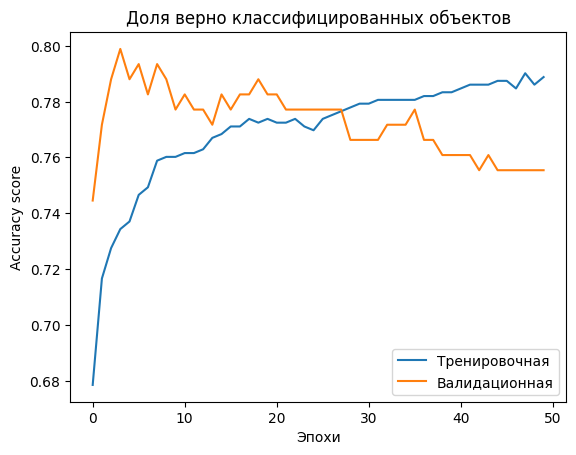

In [ ]:
plt.plot(history.history['accuracy'], label='Тренировочная')
plt.plot(history.history['val_accuracy'], label='Валидационная')
plt.title('Доля верно классифицированных объектов')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy score')
plt.legend()

На основе данных графика можно заметить, что до примерно 26 эпохи доля правильной классификации валидационных данных была выше тренировочной, а затем начала падать. Однако модель имеет высокие значения доли правильных предсказаний на всем протяжении графика. Таким образом, модель с первой эпохи хорошо определяет данные.

Построен график метрик ошибок по эпохам.

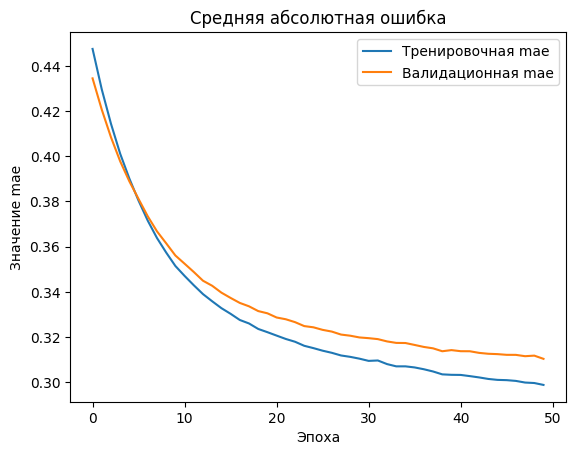

In [ ]:
plt.plot(history.history['mae'], label='Тренировочная mae')
plt.plot(history.history['val_mae'], label = 'Валидационная mae')
plt.title('Средняя абсолютная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Значение mae')
plt.legend()

На графике видно, что значения ошибки постепенно снижается, что говорит об улучшении качества модели на всем протяжении показанного графика.

Построение ROC-кривой.

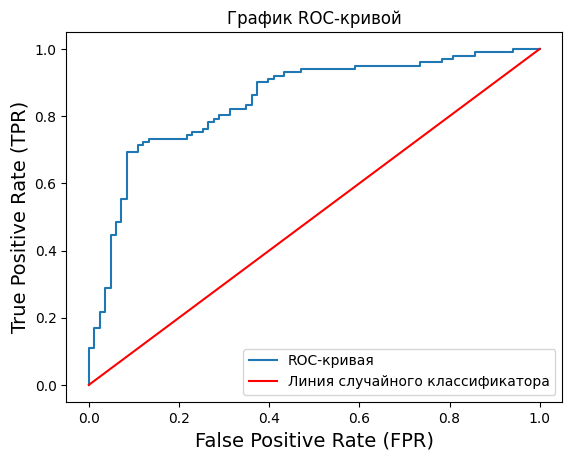

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC-кривая')
plt.plot([0, 1], [0, 1], color='red', label='Линия случайного классификатора')
plt.title('График ROC-кривой')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend()
plt.show()

Так как ROC-кривая находится выше линии случайных значений, можно говорить о том, что модель имеет высокую долю правильно классифицированных положительных примеров и низкую долю неправильно классифицированных отрицательных примеров.

**Вывод**

В процессе выполнения работы были созданы и обучены нейронные сети для выполнения задачи регрессии и классификации.

На основе данных о стоимости квартир в Москве и Московской области была создана нейросеть, которая предсказывает стоимость квартир. Однако выбранная архитектура не позволяет добится хорошего обучения модели, поэтому предсказания сильно отличаются от истинных значений. Значение потерь на 80 эпохе составляет 1954131468091392, а среднее арифметическое абсолютных значений ошибок - 15719261. Потери и ошибки слишеом велики. Полученная сеть не способна помочь при выборе квартиры.

На основе данных о сердечных болезнях была создана нейросеть бинарной классификации, которая предсказывает наличие сердечных болезней у пациентов. Самое лучшее значение доли верных предсказаний на валидационных данных 0.7989 было достигнуто на 4 эпохе. Самое низкое значение средней абсолютной ошибки 0.3104 было получено на 50 эпохе. На основе анализа ошибок и метрик качества можно сказать, что модель хорошо обучена и верно классифицирует данные в большинстве случаев. Созданная сеть может помочь врачам выявлять проблемы с сердцем автоматически.

Нейросети помогают в поиске зависимостей между данными и выполнению предсказаний на основе тренировочных данных.

**Дополнительное задание:**

Задание: Улучшить полносвязную модель для задачи регрессии по данным стоимости квартир в Москве и Московской области.

Для анализа корелляции между признаками при помощи матрицы корреляции.

In [ ]:
X.corr()

,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
Minutes to metro,1.000000,-0.072122,-0.077566,-0.070488,-0.048955,0.020764,-0.022900
Number of rooms,-0.072122,1.000000,0.690907,0.672507,0.461394,0.092327,0.080671
Area,-0.077566,0.690907,1.000000,0.913924,0.708700,0.087246,0.051038
Living area,-0.070488,0.672507,0.913924,1.000000,0.584776,0.070484,0.038461
Kitchen area,-0.048955,0.461394,0.708700,0.584776,1.000000,0.140354,0.118731
Floor,0.020764,0.092327,0.087246,0.070484,0.140354,1.000000,0.587687
Number of floors,-0.022900,0.080671,0.051038,0.038461,0.118731,0.587687,1.000000


По данным матрицы корреляции прослеживается связь между Living area и Area, Number of rooms и Living area. Для избежания проблемы мультиколлинеарности, нестабильности модели требуется исключить значения поля Living area.

In [ ]:
import numpy as np
X_train = np.delete(X_train, 3, axis=1)
X_valid = np.delete(X_valid, 3, axis=1)

Создается полносвязная нейронная сеть с 5 слоями.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

input_shape = X_train.shape[1] # количество признаков

model.add(Dense(units=1024, activation='relu', input_shape=(input_shape,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))

# вывод структуры модели
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1024)              7168      
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 16)                1040      
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 565857 (2.16 MB)
Trainable params: 565857 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Вводятся параметры для модели и выполняется обучение и предсказание.

In [ ]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
predictions = model.predict(X_valid)

Epoch 1/50
521/521 [==============================] - 19s 30ms/step - loss: 6488141342965760.0000 - mae: 29255806.0000 - val_loss: 2656792949555200.0000 - val_mae: 21714560.0000
Epoch 2/50
521/521 [==============================] - 11s 20ms/step - loss: 2909174354673664.0000 - mae: 22763486.0000 - val_loss: 2289715784974336.0000 - val_mae: 20404830.0000
Epoch 3/50
521/521 [==============================] - 8s 16ms/step - loss: 2664050102108160.0000 - mae: 20582686.0000 - val_loss: 2189495541694464.0000 - val_mae: 19796176.0000
Epoch 4/50
521/521 [==============================] - 9s 17ms/step - loss: 2526199905517568.0000 - mae: 19383052.0000 - val_loss: 2159373056999424.0000 - val_mae: 19198244.0000
Epoch 5/50
521/521 [==============================] - 9s 17ms/step - loss: 2423294636589056.0000 - mae: 18475366.0000 - val_loss: 2050646228336640.0000 - val_mae: 17535560.0000
Epoch 6/50
521/521 [==============================] - 9s 18ms/step - loss: 2361177061457920.0000 - mae: 17664858.

Чтобы оценить качество созданной модели создается датасет с истинными и предсказанными значениями, по нему строится график. На основе значений ошибки mae и потерь строятся два графика.

       True Values  Predicted Values
14440   10609700.0        14777500.0
9818   140000000.0       380482400.0
4398     8090000.0        10105220.0
9245   132000000.0       176588768.0
15827    5823600.0         7159965.0
...            ...               ...
2487    26281000.0        25177068.0
16787    2638290.0         5450079.5
18586    7441612.0        11367582.0
11685   27840000.0       114959592.0
9520    83000000.0       134335504.0

[4169 rows x 2 columns]


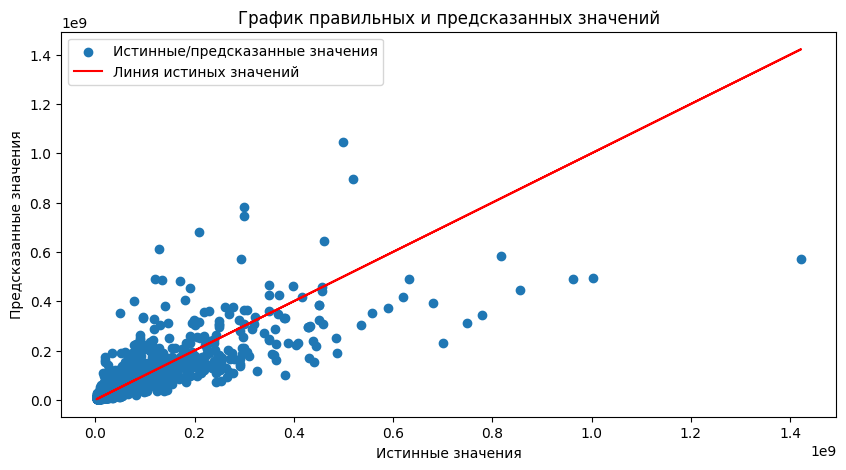

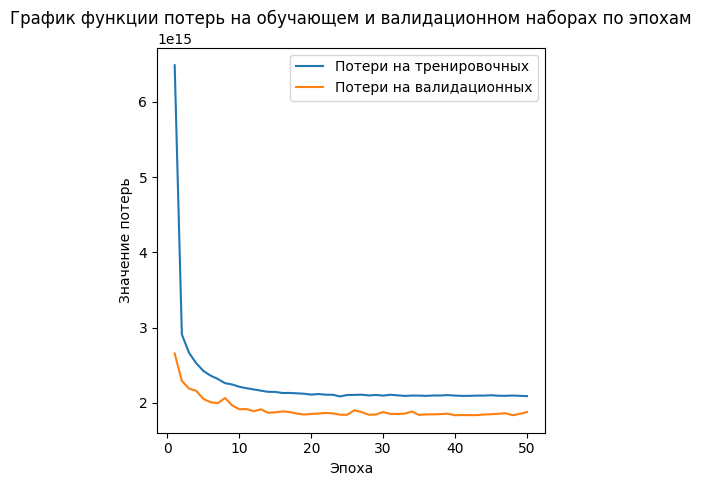

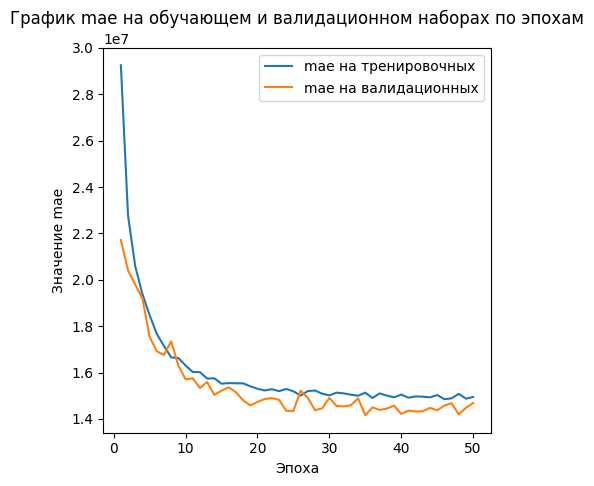

In [ ]:
true_pred_val = pd.DataFrame({'True Values': y_valid, 'Predicted Values': predictions.flatten()})
print(true_pred_val)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(true_pred_val['True Values'], true_pred_val['Predicted Values'],
            label='Истинные/предсказанные значения')
plt.plot(true_pred_val['True Values'], true_pred_val['True Values'],
         color='red', label='Линия истиных значений')
plt.title('График правильных и предсказанных значений')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Потери на тренировочных')
plt.plot(epochs, history.history['val_loss'], label = 'Потери на валидационных')
plt.title('График функции потерь на обучающем и валидационном наборах по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
epochs = range(1, len(history.history['mae']) + 1)
plt.plot(epochs, history.history['mae'], label='mae на тренировочных')
plt.plot(epochs, history.history['val_mae'], label = 'mae на валидационных')
plt.title('График mae на обучающем и валидационном наборах по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Значение mae')
plt.legend()
plt.show()

По графику истинных и предсказанных значений можно заметить, что новая модель лучше предсказывает данные, однако не идеально. График потерь тоже показывает улучшения, теперь линии для тестового и валидационного наборов близки друг к другу, что означает улучшенное предсказание. Графики ошибок для наборов также ближе друг к другу и значения на на последней эпохе намного лучше, чем для первой.

Исходя из данных анализа для первой и второй созданных моделей предсказания стоимости квартиры в Москве и Московской области можно заметить, что увеличение количества слоев привело к улучшению качества модели. Значения ошибок и потерь все еще высоки, однако знание о том, что произошло улучшение дает понять, что добавление дополнительных слоев поможет в достижении хорошего качества модели. Такие результаты могут быть также из-за большого количества выбросов.

В результате модель улучшена.